# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import scipy.stats as st
from scipy.stats import linregress
from IPython.display import HTML, display, Markdown, Latex

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Images reside in the output_data folder
image_path = os.path.join('..', 'output_data', "")

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Define variables
units = 'imperial'

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city + "&appid=" +  weather_api_key + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Call function to recalculate maximum temperature to farenheight
       # convert_temp(city_max_temp)
       # city_max_temp = int(max_tempF)

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | olavarria
Processing Record 3 of Set 1 | iracoubo
Processing Record 4 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 5 of Set 1 | alice springs
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | labuhan
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | san juan
Processing Record 11 of Set 1 | yaan
Processing Record 12 of Set 1 | guerrero negro
Processing Record 13 of Set 1 | vila franca do campo
Processing Record 14 of Set 1 | horadiz
Processing Record 15 of Set 1 | khash
Processing Record 16 of Set 1 | paamiut
Processing Record 17 of Set 1 | tigil
Processing Record 18 of Set 1 | cabo san lucas
Processing Record 19 of Set 1 | mantua
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | puerto ayora
Processing R

City not found. Skipping...
Processing Record 37 of Set 4 | nouadhibou
Processing Record 38 of Set 4 | palm coast
Processing Record 39 of Set 4 | bara
Processing Record 40 of Set 4 | myrtle beach
Processing Record 41 of Set 4 | harper
Processing Record 42 of Set 4 | norman wells
Processing Record 43 of Set 4 | georgetown
Processing Record 44 of Set 4 | berezovyy
Processing Record 45 of Set 4 | saint-louis
Processing Record 46 of Set 4 | touros
Processing Record 47 of Set 4 | khasan
Processing Record 48 of Set 4 | havoysund
Processing Record 49 of Set 4 | kalol
Processing Record 0 of Set 5 | flinders
Processing Record 1 of Set 5 | tangermunde
Processing Record 2 of Set 5 | pochutla
Processing Record 3 of Set 5 | bandiagara
Processing Record 4 of Set 5 | klaksvik
Processing Record 5 of Set 5 | pevek
Processing Record 6 of Set 5 | porto novo
Processing Record 7 of Set 5 | bambous virieux
Processing Record 8 of Set 5 | barrow
Processing Record 9 of Set 5 | nishihara
Processing Record 10 of

Processing Record 25 of Set 8 | great yarmouth
Processing Record 26 of Set 8 | maniitsoq
Processing Record 27 of Set 8 | klyuchi
Processing Record 28 of Set 8 | hami
Processing Record 29 of Set 8 | antofagasta
Processing Record 30 of Set 8 | saint-pierre
Processing Record 31 of Set 8 | teya
Processing Record 32 of Set 8 | ramhormoz
Processing Record 33 of Set 8 | naze
Processing Record 34 of Set 8 | policka
Processing Record 35 of Set 8 | missoula
Processing Record 36 of Set 8 | hirara
Processing Record 37 of Set 8 | nha trang
Processing Record 38 of Set 8 | severo-kurilsk
Processing Record 39 of Set 8 | marienburg
Processing Record 40 of Set 8 | husavik
Processing Record 41 of Set 8 | marcona
City not found. Skipping...
Processing Record 42 of Set 8 | sattahip
Processing Record 43 of Set 8 | jiujiang
Processing Record 44 of Set 8 | bayshore gardens
Processing Record 45 of Set 8 | prainha
Processing Record 46 of Set 8 | provideniya
Processing Record 47 of Set 8 | ahuimanu
Processing Re

Processing Record 14 of Set 12 | byron bay
Processing Record 15 of Set 12 | anaconda
Processing Record 16 of Set 12 | tashtyp
Processing Record 17 of Set 12 | bauru
Processing Record 18 of Set 12 | pompeu
Processing Record 19 of Set 12 | marzuq
Processing Record 20 of Set 12 | svetlaya
Processing Record 21 of Set 12 | upata
Processing Record 22 of Set 12 | odweyne
Processing Record 23 of Set 12 | jamsa
Processing Record 24 of Set 12 | tucuman
Processing Record 25 of Set 12 | slobodskoy
Processing Record 26 of Set 12 | narsaq
Processing Record 27 of Set 12 | plainview
Processing Record 28 of Set 12 | lodja
Processing Record 29 of Set 12 | valentigney
Processing Record 30 of Set 12 | svetlogorsk
Processing Record 31 of Set 12 | sidi qasim
City not found. Skipping...
Processing Record 32 of Set 12 | timra
Processing Record 33 of Set 12 | trairi
Processing Record 34 of Set 12 | takoradi
Processing Record 35 of Set 12 | tarboro
Processing Record 36 of Set 12 | beitbridge
Processing Record 3

In [5]:
# confirm the request results
city_weather.items()

dict_items([('coord', {'lon': 20.9167, 'lat': 14.5333}), ('weather', [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}]), ('base', 'stations'), ('main', {'temp': 63.95, 'feels_like': 60.6, 'temp_min': 63.95, 'temp_max': 63.95, 'pressure': 1014, 'humidity': 12, 'sea_level': 1014, 'grnd_level': 956}), ('visibility', 10000), ('wind', {'speed': 11.95, 'deg': 79, 'gust': 23.17}), ('clouds', {'all': 87}), ('dt', 1675918719), ('sys', {'country': 'TD', 'sunrise': 1675918964, 'sunset': 1675960707}), ('timezone', 3600), ('id', 244878), ('name', 'Biltine'), ('cod', 200)])

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olavarria,-36.8927,-60.3225,65.80,64,22,7.76,AR,1675918523
1,iracoubo,5.4802,-53.2011,74.88,90,100,10.65,GF,1675918524
2,alice springs,-23.7000,133.8833,98.15,19,2,17.27,AU,1675918525
3,bluff,-46.6000,168.3333,56.80,61,78,16.91,NZ,1675918489
4,bredasdorp,-34.5322,20.0403,66.24,79,2,9.13,ZA,1675918525


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
#city_data_df.info()
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olavarria,-36.8927,-60.3225,65.80,64,22,7.76,AR,1675918523
1,iracoubo,5.4802,-53.2011,74.88,90,100,10.65,GF,1675918524
2,alice springs,-23.7000,133.8833,98.15,19,2,17.27,AU,1675918525
3,bluff,-46.6000,168.3333,56.80,61,78,16.91,NZ,1675918489
4,bredasdorp,-34.5322,20.0403,66.24,79,2,9.13,ZA,1675918525


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

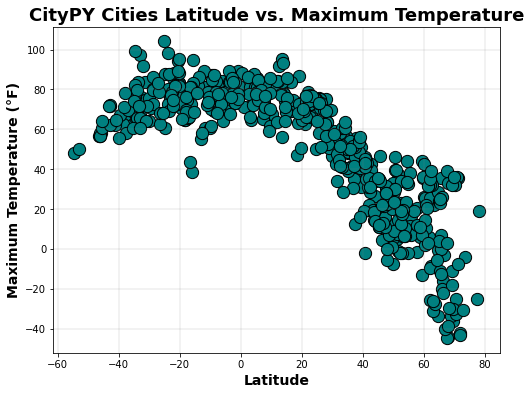

In [10]:
# Build scatter plot for latitude vs. temperature
## Figure 1 image
fig1 = city_data_df.plot(
                        kind='scatter',
                        x='Lat', y='Max Temp',
                        legend=False, marker='o',
                        figsize=(8,6), s= 150,
                        edgecolor='Black',
                        c='Teal'
)

# set title, labels, grid, then save and present the data
fig1.set_title('CityPY Cities Latitude vs. Maximum Temperature', fontsize=18, weight='bold')
fig1.set_xlabel('Latitude', fontsize=14, weight='bold')
fig1.set_ylabel('Maximum Temperature (°F)', fontsize=14, weight='bold')
fig1.grid(color='gray', linestyle='-', linewidth=0.2)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

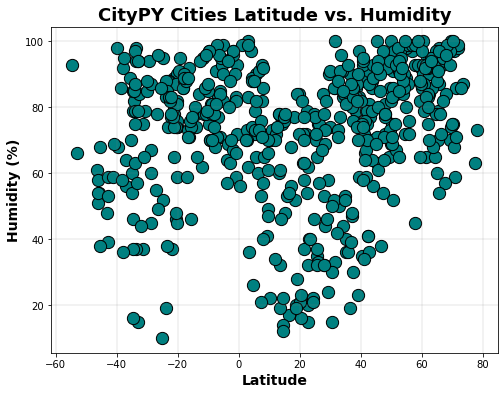

In [11]:
# Build the scatter plots for latitude vs. humidity
## Figure 2 image
fig2 = city_data_df.plot(
                        kind='scatter',
                        x='Lat', y='Humidity',
                        legend=False, marker='o',
                        figsize=(8,6), s= 150,
                        edgecolor='Black',
                        c='Teal'
)

# set title, labels, grid, then save and present the data
fig2.set_title('CityPY Cities Latitude vs. Humidity', fontsize=18, weight='bold')
fig2.set_xlabel('Latitude', fontsize=14, weight='bold')
fig2.set_ylabel('Humidity (%)', fontsize=14, weight='bold')
fig2.grid(color='gray', linestyle='-', linewidth=0.2)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

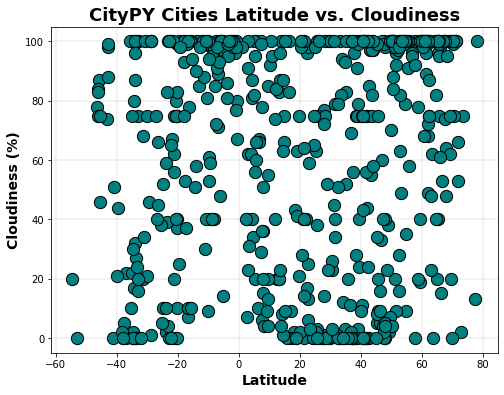

In [12]:
# Build the scatter plots for latitude vs. cloudiness
## Figure 3 image
fig3 = city_data_df.plot(
                        kind='scatter',
                        x='Lat', y='Cloudiness',
                        legend=False, marker='o',
                        figsize=(8,6), s= 150,
                        edgecolor='Black',
                        c='Teal'
)
# set title, labels, grid, then save and present the data
fig3.set_title('CityPY Cities Latitude vs. Cloudiness', fontsize=18, weight='bold')
fig3.set_xlabel('Latitude', fontsize=14, weight='bold')
fig3.set_ylabel('Cloudiness (%)', fontsize=14, weight='bold')
fig3.grid(color='gray', linestyle='-', linewidth=0.2)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

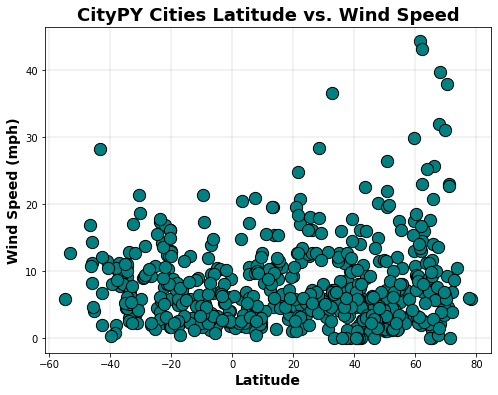

In [13]:
# Build the scatter plots for latitude vs. wind speed
## Figure 4 image
fig4 = city_data_df.plot(
                        kind='scatter',
                        x='Lat', y='Wind Speed',
                        legend=False, marker='o',
                        figsize=(8,6), s= 150,
                        edgecolor='Black',
                        c='Teal'
)

# set title, labels, grid, then save and present the data
fig4.set_title('CityPY Cities Latitude vs. Wind Speed', fontsize=18, weight='bold')
fig4.set_xlabel('Latitude', fontsize=14, weight='bold')
fig4.set_ylabel('Wind Speed (mph)', fontsize=14, weight='bold')
fig4.grid(color='gray', linestyle='-', linewidth=0.2)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The correlation coefficient between Latitude and Maximum Temperature is -0.78
The r-value is: 0.6112439987241477


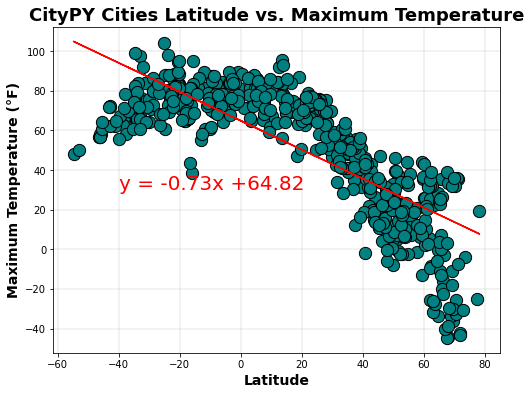

In [14]:
# Define a function to create Linear Regression plots for Latitude vs. each of Maximum Temperature, Humidity, Cloudiness, and Wind Speed
## Figure 5 image
plt.subplots(figsize=(8,6))

# set up the value to graph
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

# print the correlation coefficient
print(f"The correlation coefficient between Latitude and Maximum Temperature is {round(st.pearsonr(x_values, y_values)[0],2)}")

# for latitude (x-values) and Maximum Temperature (y_values) for the CityPY Cities selected
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values =x_values * slope + intercept

# set up the y=mx+b detail to overlay the scatter plot
slope_intercept = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))  ## y = mx + b

# plot details, add annotation, add chart features
plt.scatter(x_values, y_values, s=150, marker='o', edgecolors='Black', c='Teal')
plt.plot(x_values, regress_values, 'r-') ##'r-' is a red line

plt.annotate(slope_intercept, (-40,30), fontsize=20,color="red")

# set title, labels, grid, then save and present the data
plt.title('CityPY Cities Latitude vs. Maximum Temperature', fontsize=18, weight='bold')           
plt.xlabel('Latitude', fontsize=14, weight='bold')
plt.ylabel('Maximum Temperature (°F)', fontsize=14, weight='bold')
plt.grid(color='gray', linestyle='-', linewidth=0.2)

# print r value
print(f'The r-value is: {rvalue**2}')

# Save the figure
plt.savefig("output_data/Fig5.png")

# present the data
plt.show()

The correlation coefficient between latitude and Humidity is 0.19
The r-value is: 0.034328056656041224


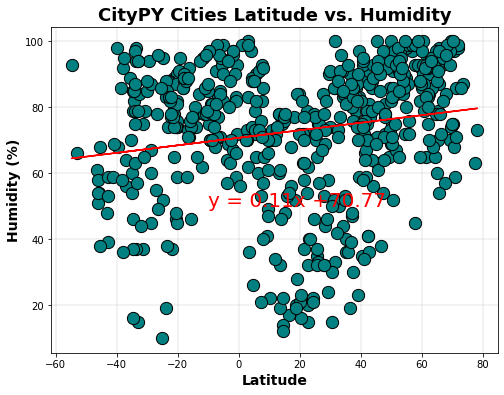

In [15]:
# Define a function to create Linear Regression plots for Latitude vs. each of Maximum Temperature, Humidity, Cloudiness, and Wind Speed
## Figure 6 image
plt.subplots(figsize=(8,6))

x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
print(f"The correlation coefficient between latitude and Humidity is {round(st.pearsonr(x_values, y_values)[0],2)}")

# for latitude (x-values) and Humidity (y_values) for the CityPY Cities selected
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values =x_values * slope + intercept

# set up the y=mx+b detail to overlay the scatter plot
slope_intercept = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))  ## y = mx + b

# plot details, add annotation, add chart features
plt.scatter(x_values, y_values, s=150, marker='o', edgecolors='Black', c='Teal')
plt.plot(x_values, regress_values, 'r-') ##'r-' is a red line

plt.annotate(slope_intercept, xy=(-10,50), xytext=(-10,50), fontsize=20,color="red")

# set title, labels, grid, then save and present the data
plt.title('CityPY Cities Latitude vs. Humidity', fontsize=18, weight='bold')           
plt.xlabel('Latitude', fontsize=14, weight='bold')
plt.ylabel('Humidity (%)', fontsize=14, weight='bold')
plt.grid(color='gray', linestyle='-', linewidth=0.2)

# print r value
print(f'The r-value is: {rvalue**2}')

# Save the figure
plt.savefig("output_data/Fig6.png")

# present the data
plt.show()

The correlation coefficient between Latitude and Cloudiness is 0.12
The r-value is: 0.014055462278124212


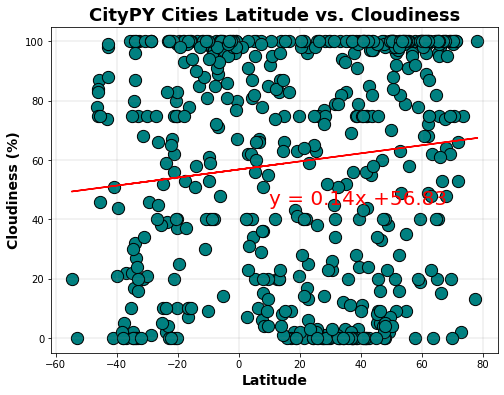

In [16]:
# Define a function to create Linear Regression plots for Latitude vs. each of Maximum Temperature, Humidity, Cloudiness, and Wind Speed
## Figure 7 image
plt.subplots(figsize=(8,6))

x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
print(f"The correlation coefficient between Latitude and Cloudiness is {round(st.pearsonr(x_values, y_values)[0],2)}")

# for latitude (x-values) and Cloudiness (y_values) for the CityPY Cities selected
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values =x_values * slope + intercept

# set up the y=mx+b detail to overlay the scatter plot
slope_intercept = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))  ## y = mx + b

# plot details, add annotation, add chart features
plt.scatter(x_values, y_values, s=150, marker='o', edgecolors='Black', c='Teal')
plt.plot(x_values, regress_values, 'r-') ##'r-' is a red line

plt.annotate(slope_intercept, xy=(10,45), xytext=(10,45), fontsize=20,color="red")

# set title, labels, grid, then save and present the data
plt.title('CityPY Cities Latitude vs. Cloudiness', fontsize=18, weight='bold')           
plt.xlabel('Latitude', fontsize=14, weight='bold')
plt.ylabel('Cloudiness (%)', fontsize=14, weight='bold')
plt.grid(color='gray', linestyle='-', linewidth=0.2)

# print r value
print(f'The r-value is: {rvalue**2}')

# Save the figure
plt.savefig("output_data/Fig7.png")

# present the data
plt.show()

The correlation coefficient between Latitude and Wind Speed is 0.08
The r-value is: 0.005784725242826979


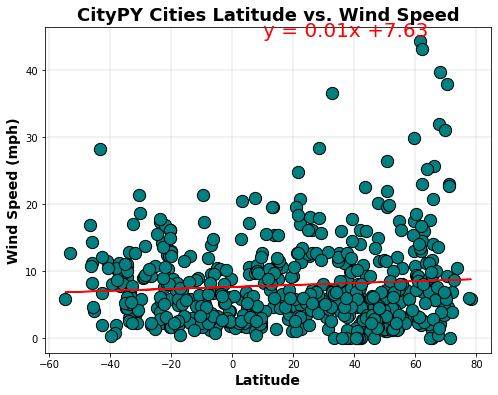

In [17]:
# Define a function to create Linear Regression plots for Latitude vs. each of Maximum Temperature, Humidity, Cloudiness, and Wind Speed
## Figure 8 image
plt.subplots(figsize=(8,6))

x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
print(f"The correlation coefficient between Latitude and Wind Speed is {round(st.pearsonr(x_values, y_values)[0],2)}")

# for latitude (x-values) and Wind Speed (y_values) for the CityPY Cities selected
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values =x_values * slope + intercept

# set up the y=mx+b detail to overlay the scatter plot
slope_intercept = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))  ## y = mx + b

# plot details, add annotation, add chart features
plt.scatter(x_values, y_values, s=150, marker='o', edgecolors='Black', c='Teal')
plt.plot(x_values, regress_values, 'r-') ##'r-' is a red line

plt.annotate(slope_intercept, xy=(10,45), xytext=(10,45), fontsize=20,color="red")

# set title, labels, grid, then save and present the data
plt.title('CityPY Cities Latitude vs. Wind Speed', fontsize=18, weight='bold')           
plt.xlabel('Latitude', fontsize=14, weight='bold')
plt.ylabel('Wind Speed (mph)', fontsize=14, weight='bold')
plt.grid(color='gray', linestyle='-', linewidth=0.2)

# print r value
print(f'The r-value is: {rvalue**2}')

# Save the figure
plt.savefig("output_data/Fig8.png")

# present the data
plt.show()

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,iracoubo,5.4802,-53.2011,74.88,90,100,10.65,GF,1675918524
8,yaan,7.3833,8.5667,73.51,53,100,4.45,NG,1675918527
9,guerrero negro,27.9769,-114.0611,60.31,53,14,5.32,MX,1675918447
10,vila franca do campo,37.7167,-25.4333,55.81,76,96,8.72,PT,1675918416
11,horadiz,39.4488,47.3353,32.77,97,100,5.26,AZ,1675918528


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olavarria,-36.8927,-60.3225,65.80,64,22,7.76,AR,1675918523
2,alice springs,-23.7000,133.8833,98.15,19,2,17.27,AU,1675918525
3,bluff,-46.6000,168.3333,56.80,61,78,16.91,NZ,1675918489
4,bredasdorp,-34.5322,20.0403,66.24,79,2,9.13,ZA,1675918525
5,labuhan,-6.8844,112.2051,83.52,77,89,13.82,ID,1675918526


###  Temperature vs. Latitude Linear Regression Plot

In [20]:
# # y_tests = ['Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
# # m = y_tests[1]
# # m

# # hemi = f'hemispheres[0]_hemi_df'
# # x_values = hemi['Lat']
# # x_values
# hemispheres = ['northern', 'southern']

# #hemi = f'{hemispheres[0]}_hemi_
# hemi = hemispheres[1] + '_hemi_df'
# hemi

In [21]:
hemispheres = [northern_hemi_df, southern_hemi_df]
hemispheres[0]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,iracoubo,5.4802,-53.2011,74.88,90,100,10.65,GF,1675918524
8,yaan,7.3833,8.5667,73.51,53,100,4.45,NG,1675918527
9,guerrero negro,27.9769,-114.0611,60.31,53,14,5.32,MX,1675918447
10,vila franca do campo,37.7167,-25.4333,55.81,76,96,8.72,PT,1675918416
11,horadiz,39.4488,47.3353,32.77,97,100,5.26,AZ,1675918528
...,...,...,...,...,...,...,...,...,...
555,vulcan,45.3833,23.2667,12.09,92,34,2.17,RO,1675918529
556,ulaanbaatar,47.9077,106.8832,-0.27,78,4,4.47,MN,1675918435
557,roswell,34.0232,-84.3616,63.52,85,0,6.91,US,1675918718


The correlation coefficient between Latitude and Max Temp is -0.87. The r-value is: 0.75.
The correlation coefficient between Latitude and Humidity is 0.43. The r-value is: 0.18.
The correlation coefficient between Latitude and Cloudiness is 0.26. The r-value is: 0.07.
The correlation coefficient between Latitude and Wind Speed is 0.13. The r-value is: 0.02.


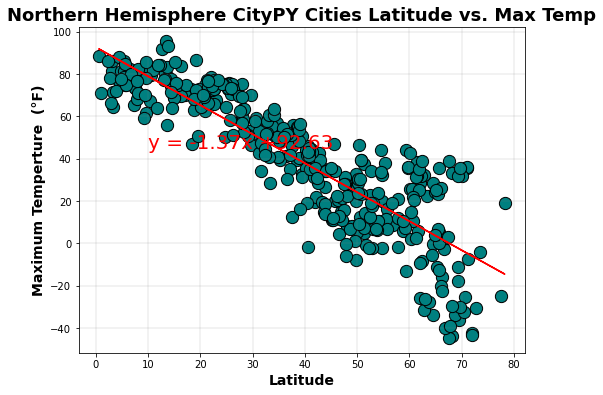

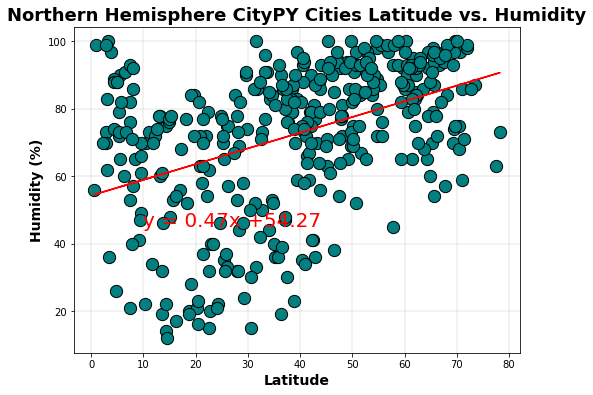

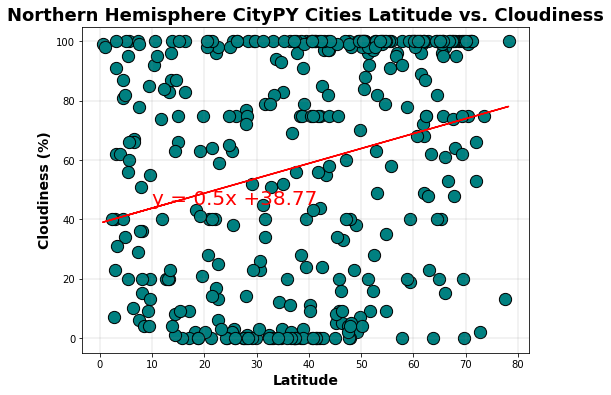

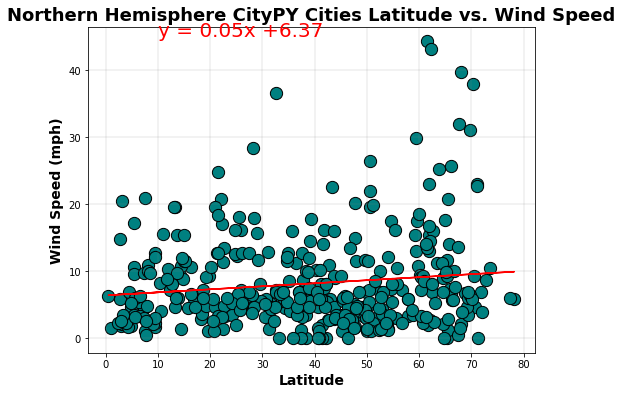

The correlation coefficient between Latitude and Max Temp is 0.36. The r-value is: 0.13.
The correlation coefficient between Latitude and Humidity is 0.33. The r-value is: 0.11.
The correlation coefficient between Latitude and Cloudiness is 0.4. The r-value is: 0.16.
The correlation coefficient between Latitude and Wind Speed is -0.24. The r-value is: 0.06.


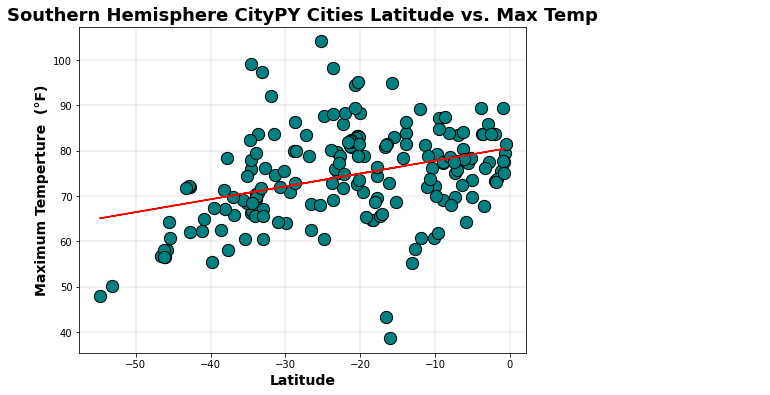

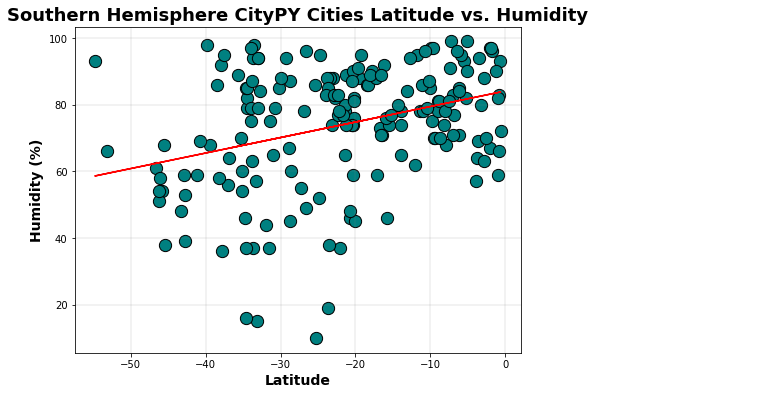

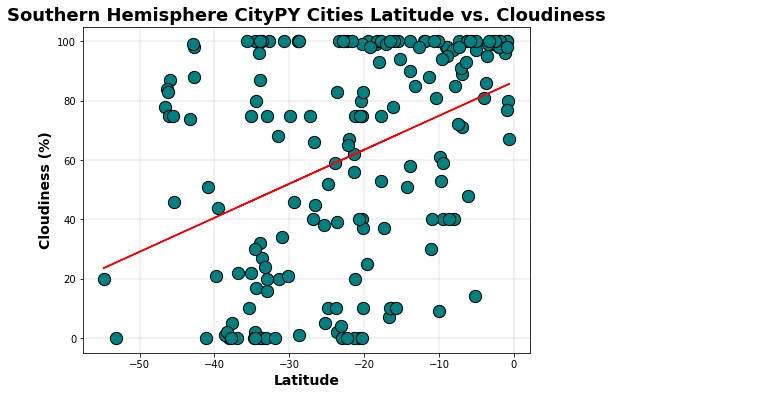

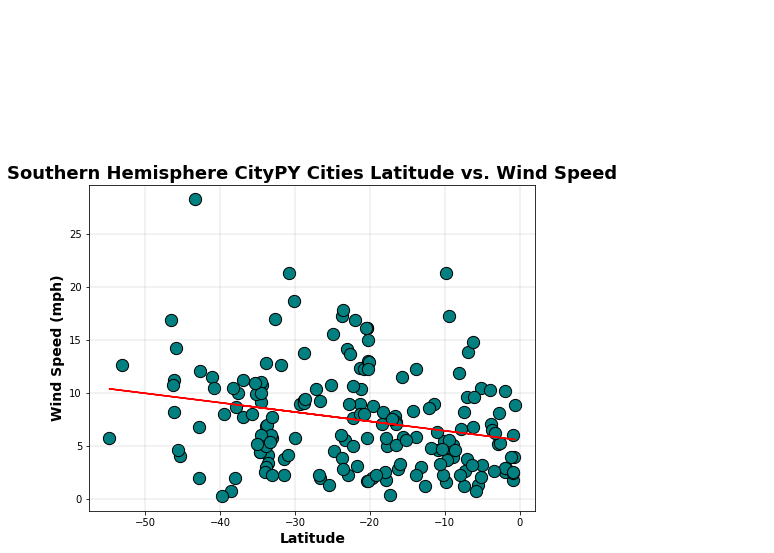

In [23]:
# Define a function to create Linear Regression plots for Latitude vs. each of Maximum Temperature, Humidity, Cloudiness, and Wind Speed
# for both the Northern and Southern Hemispheres
hemispheres = [northern_hemi_df, southern_hemi_df]
hemi = ['Northern', 'Southern']
y_tests = ['Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
y_labels = ['Maximum Temperture  (°F)', 'Humidity (%)', 'Cloudiness (%)', 'Wind Speed (mph)']

h = 0  # which DataFrame the information draws
i = 0  # location criteria test number for y values

for sphere in hemispheres:    
        #start y_tests index for selection
    i = 0
    for test in y_tests:
        plt.subplots(figsize=(8,6))
        
        # assign hemisphere for processing
        x_values = sphere['Lat'] # all y values compared with Latitude
        y_values = sphere[test]

        # for latitude (x-values) and listed y_values for the CityPY Cities selected by hemisphere
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values =x_values * slope + intercept
        
        # set up the y=mx+b detail to overlay the scatter plot
        slope_intercept = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))  ## y = mx + b

        #print the r-value and correlation coefficient
        print(f'The correlation coefficient between Latitude and {test} is {round(st.pearsonr(x_values, y_values)[0],2)}. The r-value is: {round(rvalue**2,2)}.')
        
        # plot details, add annotation, add chart features
        plt.scatter(x_values, y_values, s=150, marker='o', edgecolors='Black', c='Teal')
        plt.plot(x_values, regress_values, 'r-') ##'r-' is a red line
        
        # overlay the slope intercept (y=mx+b)
        plt.annotate(slope_intercept, (10,45), fontsize=20,color="red")

        # set title, labels, grid, then save and present the data
        plt.title(f'{hemi[h]} Hemisphere CityPY Cities Latitude vs. {test}', fontsize=18, weight='bold')           
        plt.xlabel('Latitude', fontsize=14, weight='bold')
        plt.ylabel(y_labels[i], fontsize=14, weight='bold')
        plt.grid(color='gray', linestyle='-', linewidth=0.2)

        # print r value
        #print(f'The r-value is: {rvalue**2}')

        # Save the figure
            ## criteria used for chart add to hemisphere from list
        y = y_tests[i].replace(" ", "")        # y value test criteria minus the white spaces
        image_name = f'{hemi[h]}_{y}'       # create the image name
        file_name = f'output_data/{image_name}.png'    # create the output file name
        
        plt.savefig(file_name)

        # loop through all four criteria
        i +=1
    # loop through both hemisphere DataFrames
    h += 1
    # present the data    
    plt.show()

### Maximum Temperature vs. Latitude Linear Regression Plot


**Discussion about the linear relationship:** Temperature and Latitude have a correlation as expected. The strongest relationship is in the Northern Hemisphere with a large number of locations within 10 points of the slope intercept line.  The Southern Hemisphere shows points more spread out with 10 to 15, however, still close to understand the relationship.

### Humidity vs. Latitude Linear Regression Plot

**Discussion about the linear relationship:** There is a relationship with humidity and latitude.  These data points tend to hover mostly 20 points on either side of the slope intercept line for both hemispheres.  A higher percentage of humidity exists with locations closer to the equator (zero degrees latitude) in the Southern Hemisphere and a higher percentage of humidity exists with locations further away from the equator in the Northern Hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

**Discussion about the linear relationship:**  Cloudiness does not seem to have a strong relationship with Latitude. The closer the latitude to the equator (zero degrees latitude), there tends to be a larger number of locations with more extremes, either a very low or high percentage of cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

**Discussion about the linear relationship:** Wind Speed does not seem to have a strong relationship with Latitude. An interesting point to note is that no matter the hemishpere, the wind speed generally falls in the 2 mph to 15 mph range.